In [141]:
import pulsestreamer
import pyvisa
import numpy as np
import sys
from importlib import reload
import matplotlib.pyplot as plt
from zhinst.toolkit import Session,  Waveforms
from zhinst.toolkit import CommandTable

directory_path = r"C:\\Users\\LiLabDesktop\\Desktop\\Sumukh\\LiLabMeasurements\\LiLabMeasurements\\dev\\"
sys.path.append(directory_path)


import AWG_Measurements
reload(AWG_Measurements)

import AWG_setup
reload(AWG_setup)


directory_path2 = "C:\\Users\\LiLabDesktop\\Desktop\\Sumukh\\LiLabMeasurements\\LiLabMeasurements\\main"
sys.path.append(directory_path2)

### Initialize all instruments for use

In [142]:
# PulseStreamer
pulsestreamer_ip = '169.254.8.2'
ps = pulsestreamer.PulseStreamer(pulsestreamer_ip)
ps.reset()

# Function Generator
rm = pyvisa.ResourceManager()
sg386 = rm.open_resource('GPIB0::27::INSTR')
sg386.write('ENBR 1')

# AWG
AWG_id='DEV9175'
AWG_server_host = 'localhost'
session = Session(AWG_server_host)
### connect to device
device = session.connect_device(AWG_id)
AWG_INDEX = 0 #use channel 1&2 for 2*2
awg = device.awgs[AWG_INDEX]
awg2 = device.awgs[AWG_INDEX+1]
# Resource Manager
rm = pyvisa.ResourceManager()

Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 169.254.8.2
Pulse Streamer 8/2 firmware: v1.6.2
Client software: v1.7.0
Your client software is more up to date than the Pulse Streamer 8/2 firmware. We recommend updating the firmware of your Pulse Streamer 8/2.
For detailed information visit https://www.swabianinstruments.com/pulse-streamer-8-2/downloads/ or contact support@swabianinstruments.com


In [143]:
AWG_rabi_config = {
'position':[120,175], # Location of measurement
'scale': 8,
'samples_per_axis': 201,
'scan_area': 1, # In pixels
'aomvolt': 0.5, # Voltage to set AOM to


'nu_IQ': 244.1, # IQ modulation frequency in MHz
'IQ_amplitude': 0.9, # Amplitude of the IQ modulation
'freq': 2.85e9, # in Hz, Drive frequency of the qubit
'mw_power': 0, # in dBm

'tau_step': 1.25e-3, # in microseconds
'tau_start': 2.5e-3, # in microseconds
'n_points': 100, # number of tau points
'sequence_repetitions': 500, # number of times to repeat the pulse sequence for each tau point
'num_avgs': 1000,

'init_t': 5-0.96, # microseconds
'readout_t': .5, # microseconds
'wait_t': 2.3, # microseconds
'delay_t': 0.960, # microseconds
}

In [ ]:
awgsetup = AWG_setup.AWGSetup(AWG_rabi_config, awg, awg2)
awgsetup.Rabi_2_channel_setup()
awg_measurement = AWG_Measurements.AWGMeasurement(AWG_rabi_config, ps, sg386, awg, rm)


        const LENGTH = 3744000; // Number of subcycles * Data points per subcycle

        wave w1 = placeholder(LENGTH, false, false); // Create a waveform of size LENGTH, with one marker
        wave w2 = placeholder(LENGTH, false, false); // Create a waveform of size LENGTH, with one marker

        assignWaveIndex(w1,w2,10);                 // Create a wave table entry with placeholder waveform              
                                                // routed to output 1, with index 10

        // execute the command table entry
        executeTableEntry(0);

        while(true){
        waitDigTrigger(1);
        playWave(w1,w2);

        waitWave();
        };
        


In [145]:
# tau_range, avg_contrast, all_contrast, avg_counts, all_counts =awg_measurement.run_rabi_sweep()

In [ ]:
# import pandas as pd
# saveloc = "C:\\Users\\LiLabDesktop\\Desktop\\Sumukh\\Data\\251006_hBNVB-_GoodSampleMeasurementsCalib\\"
# df_out = pd.DataFrame({'tau_range': tau_range, 'avg_contrast': avg_contrast})
# df_out.to_csv(saveloc + 'Rabi_06_VB-_1mw_m0dBm_RabiPython.csv', index=False)

In [147]:
# all_data_for_testing = all_data

def plot_this_xy(xdata, ydata, ax, title, xlabel, ylabel, linestyle = '-', color = 'blue', linewidth = 2, marker = 'o', markersize = 2):
    ax.set_title(title, fontsize=20)
    ax.plot(xdata, ydata, linestyle = linestyle, color = color, linewidth = linewidth, marker = marker, markersize = markersize)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)


# def rabifixer(data):
#     all_contrast = np.zeros(data.shape)
#     avg_contrast = np.zeros(100)
#     all_counts = np.zeros(data.shape)
#     # all_data2 = np.zeros((self.config['num_avgs'],self.config['n_points'] * 2 * self.config['sequence_repetitions']))
#     # avg_counts = np.zeros(len(tau_range))
#     avg_mw_on = np.zeros(100)
#     avg_mw_off = np.zeros(100)

#     for j in range(1000):
#         counts = data[j,:]
#         all_data = counts.reshape(50000, 2)
#         mw_off = all_data[:,1].reshape((500,100)).sum(axis=0)
#         mw_on = all_data[:,0].reshape((500,100)).sum(axis=0)
#         # mw_off = np.array(counts[:self.config['n_points']]) # First half no MW
#         # mw_on = np.array(counts[self.config['n_points']:]) # Second half with MW
        
#         avg_contrast += mw_on/(mw_off)
#     fig, ax = plt.subplots(figsize=(8, 6))
#     plot_this_xy(tau_range*1e3, avg_contrast/1000, ax, 'Rabi Contrast', 'Tau (ns)', 'Contrast', linestyle = '-', color = 'blue', linewidth = 2, marker = 'o', markersize = 2)


# rabifixer(all_data_for_testing)

In [ ]:
AWG_ODMR_config = {
    'position':[120,175], # Location of measurement
    'scale': 8,
    'samples_per_axis': 201,
    'scan_area': 1, # In pixels
    'aomvolt': 0.5, # Voltage to set AOM to
    'ODMR_Peakfinder': False, # If True, runs a peakfinder before every frequency point
    'peakfinder_window': 5, # Size of the window to search for peak in peakfinder
    'num_avgs':4,

    'nu_IQ': 100, # IQ modulation frequency in MHz
    'IQ_amplitude': 0.9, # Amplitude of the IQ modulation
    'phase_shift': 90, # Phase shift between I and Q in degrees
    'freq': 2.85e9, # in Hz, Drive frequency of the qubit
    'mw_power': -14, # in dBm

    # 'tau_step': 1.25e-3, # in microseconds
    # 'tau_start': 2.5e-3, # in microseconds
    # 'n_points': 100, # number of tau points
    # 'sequence_repetitions': 500, # number of times to repeat the pulse sequence for each tau point
    # 'num_avgs': 1000,

    # 'init_t': 5-0.96, # microseconds
    # 'readout_t': .5, # microseconds
    # 'wait_t': 2.3, # microseconds
    # 'delay_t': 0.960, # microseconds

    'count_t': 0.1*1e6,  # All times are in NANOSeconds!!!
    'separation_t': 0.01*1e6,
    'addl_t': 0.01*1e6,
    'wait_t': 0.01*1e6,

    # Other parameters
    'pulse_sequence': 'cw_odmr',
    'aomvolt': 0.5,
    'pulsenum': 3000,
    'seqplot': False,
}


In [149]:
awgsetup.config = AWG_ODMR_config
awgsetup.CW_ODMR_2Channel()

awg_measurement.config = AWG_ODMR_config


        const LENGTH = 240000;

        wave w1 = placeholder(LENGTH, false, false); // Create a waveform of size LENGTH, with one marker
        wave w2 = placeholder(LENGTH, false, false); // Create a waveform of size LENGTH, with one marker

        assignWaveIndex(w1,w2,10);                 // Create a wave table entry with placeholder waveform              
                                                // routed to output 1, with index 10

        // execute the command table entry
        executeTableEntry(0);

        while(true){
        waitDigTrigger(1);
        playWave(w1,w2);

        waitWave();
        };
        


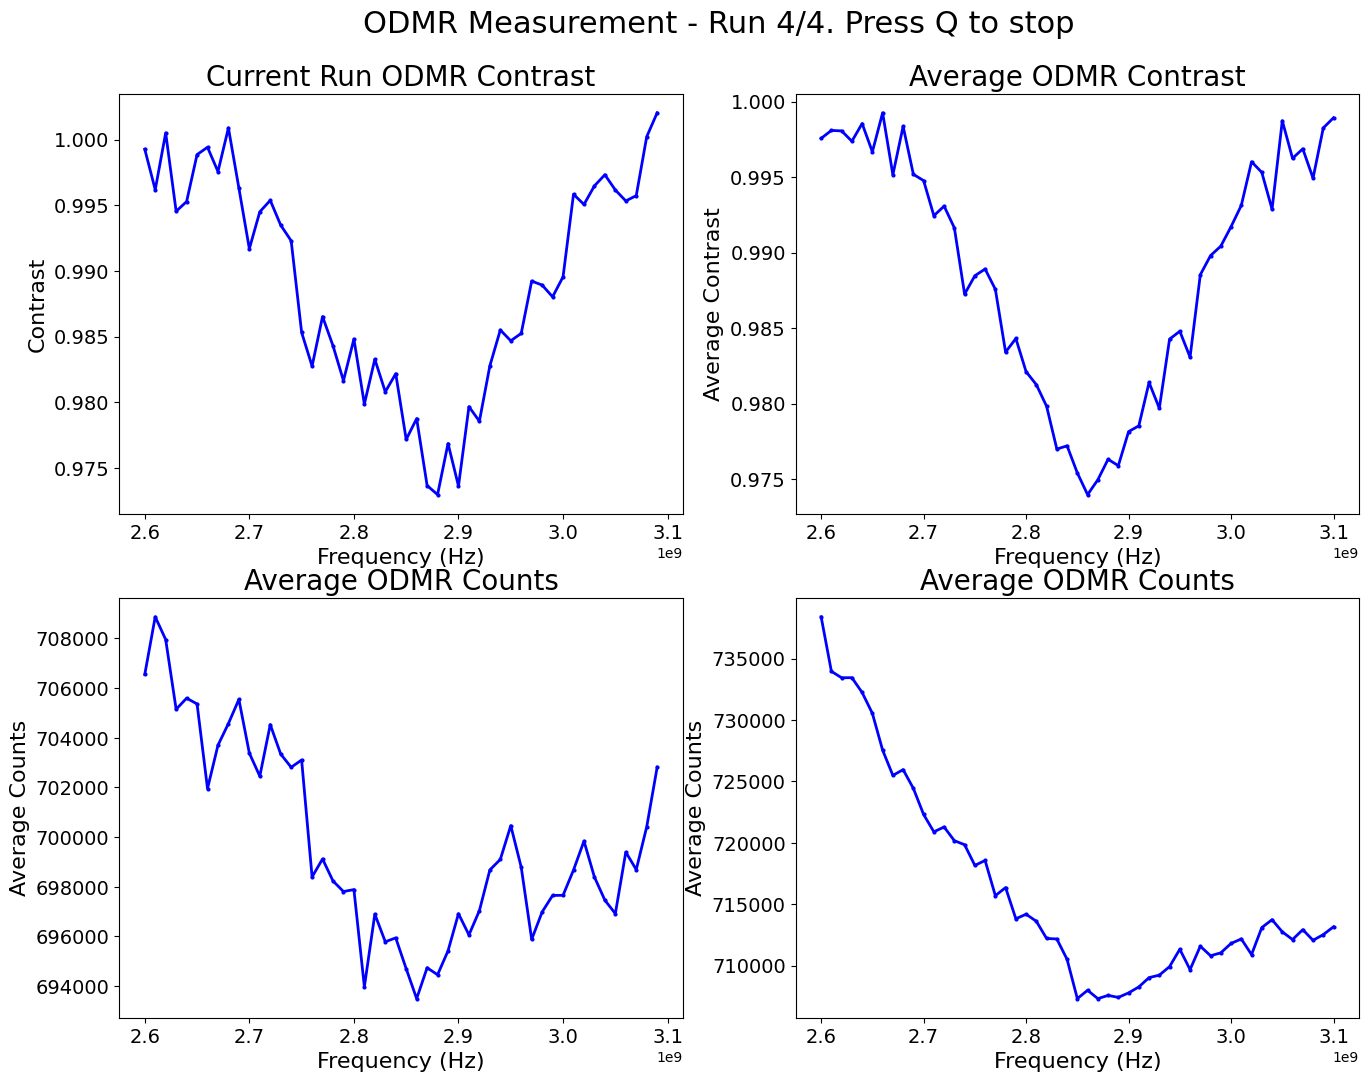

100%|██████████| 4/4 [03:37<00:00, 54.34s/it]


In [150]:
freq_range = np.linspace(2.6e9, 3.1e9, 51) # in Hz
freq_range, avg_contrast, all_contrast, avg_counts, all_counts = awg_measurement.run_frequency_sweep(freq_range)

In [ ]:
# import pandas as pd
# saveloc = "C:\\Users\\LiLabDesktop\\Desktop\\Sumukh\\Data\\251006_hBNVB-_GoodSampleMeasurementsCalib\\"
# df_out = pd.DataFrame({'frequency': freq_range, 'avg_contrast': avg_contrast})
# df_out.to_csv(saveloc + 'ODMR_02_VB-_1mw_m14dBm_ODMRPythonAWG.csv', index=False)